# **CSE422 Project**
# **Stroke** **Prediction**
**Group** - **5**

**Section** - **8**

# **Importing llibraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
sns.set_palette("Set3")
from sklearn.metrics import accuracy_score

# **Reading from dataset**
* head() function prints the upper 5 data
* tail() function prints the lower 5 data

In [ ]:
dataset = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
dataset= dataset.drop(['id'], axis= 1)
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


(5110, 11)

# Data Preprocessing

# **Checking For Null Values**

* isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False

* The sum() function returns a number, the sum of all items in an iterable.

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

*creating  groups in terms of age range in toddler, teen, adult & senior and add that column to the dataset*

# Imputing the null values of BMI.
After applying impute the null values will replace with hard coded values in terms of the range

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy= 'mean')
imputer.fit(dataset[['bmi'] ])
dataset[['bmi']]= imputer.transform(dataset[['bmi']])

# After imputing there will not be in null value

Now with isnull function and sum function we can observe that.

In [ ]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# EDA

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Shape return how many rows and columns are in the dataset.**
*Here, Rows -> 5110 & Columns -> 11*


In [ ]:
dataset.shape

(5110, 11)

# **The describe() method returns description of the data in the DataFrame**.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

In [ ]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Check if there are any duplicate values present or not
will use duplicated() function with sum() function for counting

In [ ]:
dataset.duplicated().sum()

0

# Categorical and continous columns
into separte lists for future purspose

In [ ]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in dataset.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.gender= le.fit_transform(dataset.gender.values)
dataset.ever_married= le.fit_transform(dataset.ever_married.values)
dataset.smoking_status= le.fit_transform(dataset.smoking_status.values)
dataset.work_type= le.fit_transform(dataset.work_type.values)
dataset.Residence_type= le.fit_transform(dataset.Residence_type.values)
dataset.work_type= le.fit_transform(dataset.work_type.values)


In [ ]:
dataset.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
612,1,48.0,0,0,1,2,0,147.14,22.3,0,0
1651,0,64.0,0,0,1,3,0,114.47,31.6,3,0
3040,0,23.0,0,0,0,2,1,105.28,27.1,1,0
152,0,80.0,0,0,1,3,1,76.57,34.1,2,1
2364,1,7.0,0,0,0,4,1,98.12,20.4,0,0


# Scalling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = ['gender', 'age',  'hypertension', 'heart_disease',  'ever_married', 'work_type',  'Residence_type', 'avg_glucose_level',  'bmi',  'smoking_status', 'stroke']

scaler = MinMaxScaler()

dataset[features]= scaler.fit_transform(dataset[features])

 Features and labels are divided into two new data sets

In [ ]:
x= dataset.iloc[:, : -1].values
y= dataset.iloc[:, -1: ].values

Now its time to train our data. 80% of the dataset is for Train and 20% is for test.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(KNNClassifier.score(x_test, y_test)*100)


94.32485322896281


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lrClassifier = LogisticRegression(max_iter=10000)
lrClassifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [ ]:
print(lrClassifier.score(x_test, y_test)*100)

94.71624266144813


# **Decision** **Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(dtClassifier.score(x_test, y_test)*100)

92.17221135029354


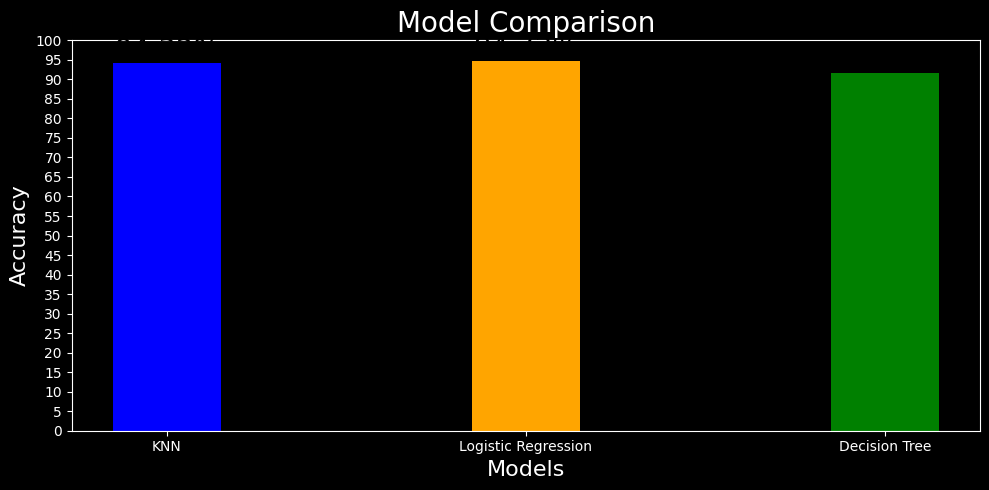

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))

models = ['KNN', 'Logistic Regression', 'Decision Tree']
accuracies = [94.32, 94.72, 91.68]  # Replace with your actual accuracy values

bar_width = 0.3

plt.bar(models, accuracies, width=bar_width, color=['blue', 'orange', 'green'])

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', fontsize=20, color='black')

plt.xlabel('Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Model Comparison', fontsize=20)

plt.yticks(range(0, 101, 5))

plt.tight_layout()
plt.show()


In [ ]:
# Your instance data
instance_data = np.array([0,40,1,0,0,1,0,46.16,37.80,2])

# Preprocessing the instance data
instance_data = instance_data.reshape(1, -1)  # Reshape the instance data

# Instantiate the models
knn_model = KNeighborsClassifier(n_neighbors=3)
logistic_model = LogisticRegression(max_iter=10000)
decision_tree_model = DecisionTreeClassifier()

# Loading trained models
knn_model.fit(x_train, y_train)
logistic_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)

# Assuming  trained models, proceed with predictions
knn_prediction = knn_model.predict(instance_data)
logistic_prediction = logistic_model.predict(instance_data)
decision_tree_prediction = decision_tree_model.predict(instance_data)

# Print predictions
print("K-Nearest Neighbors Prediction:", knn_prediction)
print("Logistic Regression Prediction:", logistic_prediction)
print("Decision Tree Prediction:", decision_tree_prediction)

K-Nearest Neighbors Prediction: [1.]
Logistic Regression Prediction: [1.]
Decision Tree Prediction: [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Visualizing Count of Categorical Columns

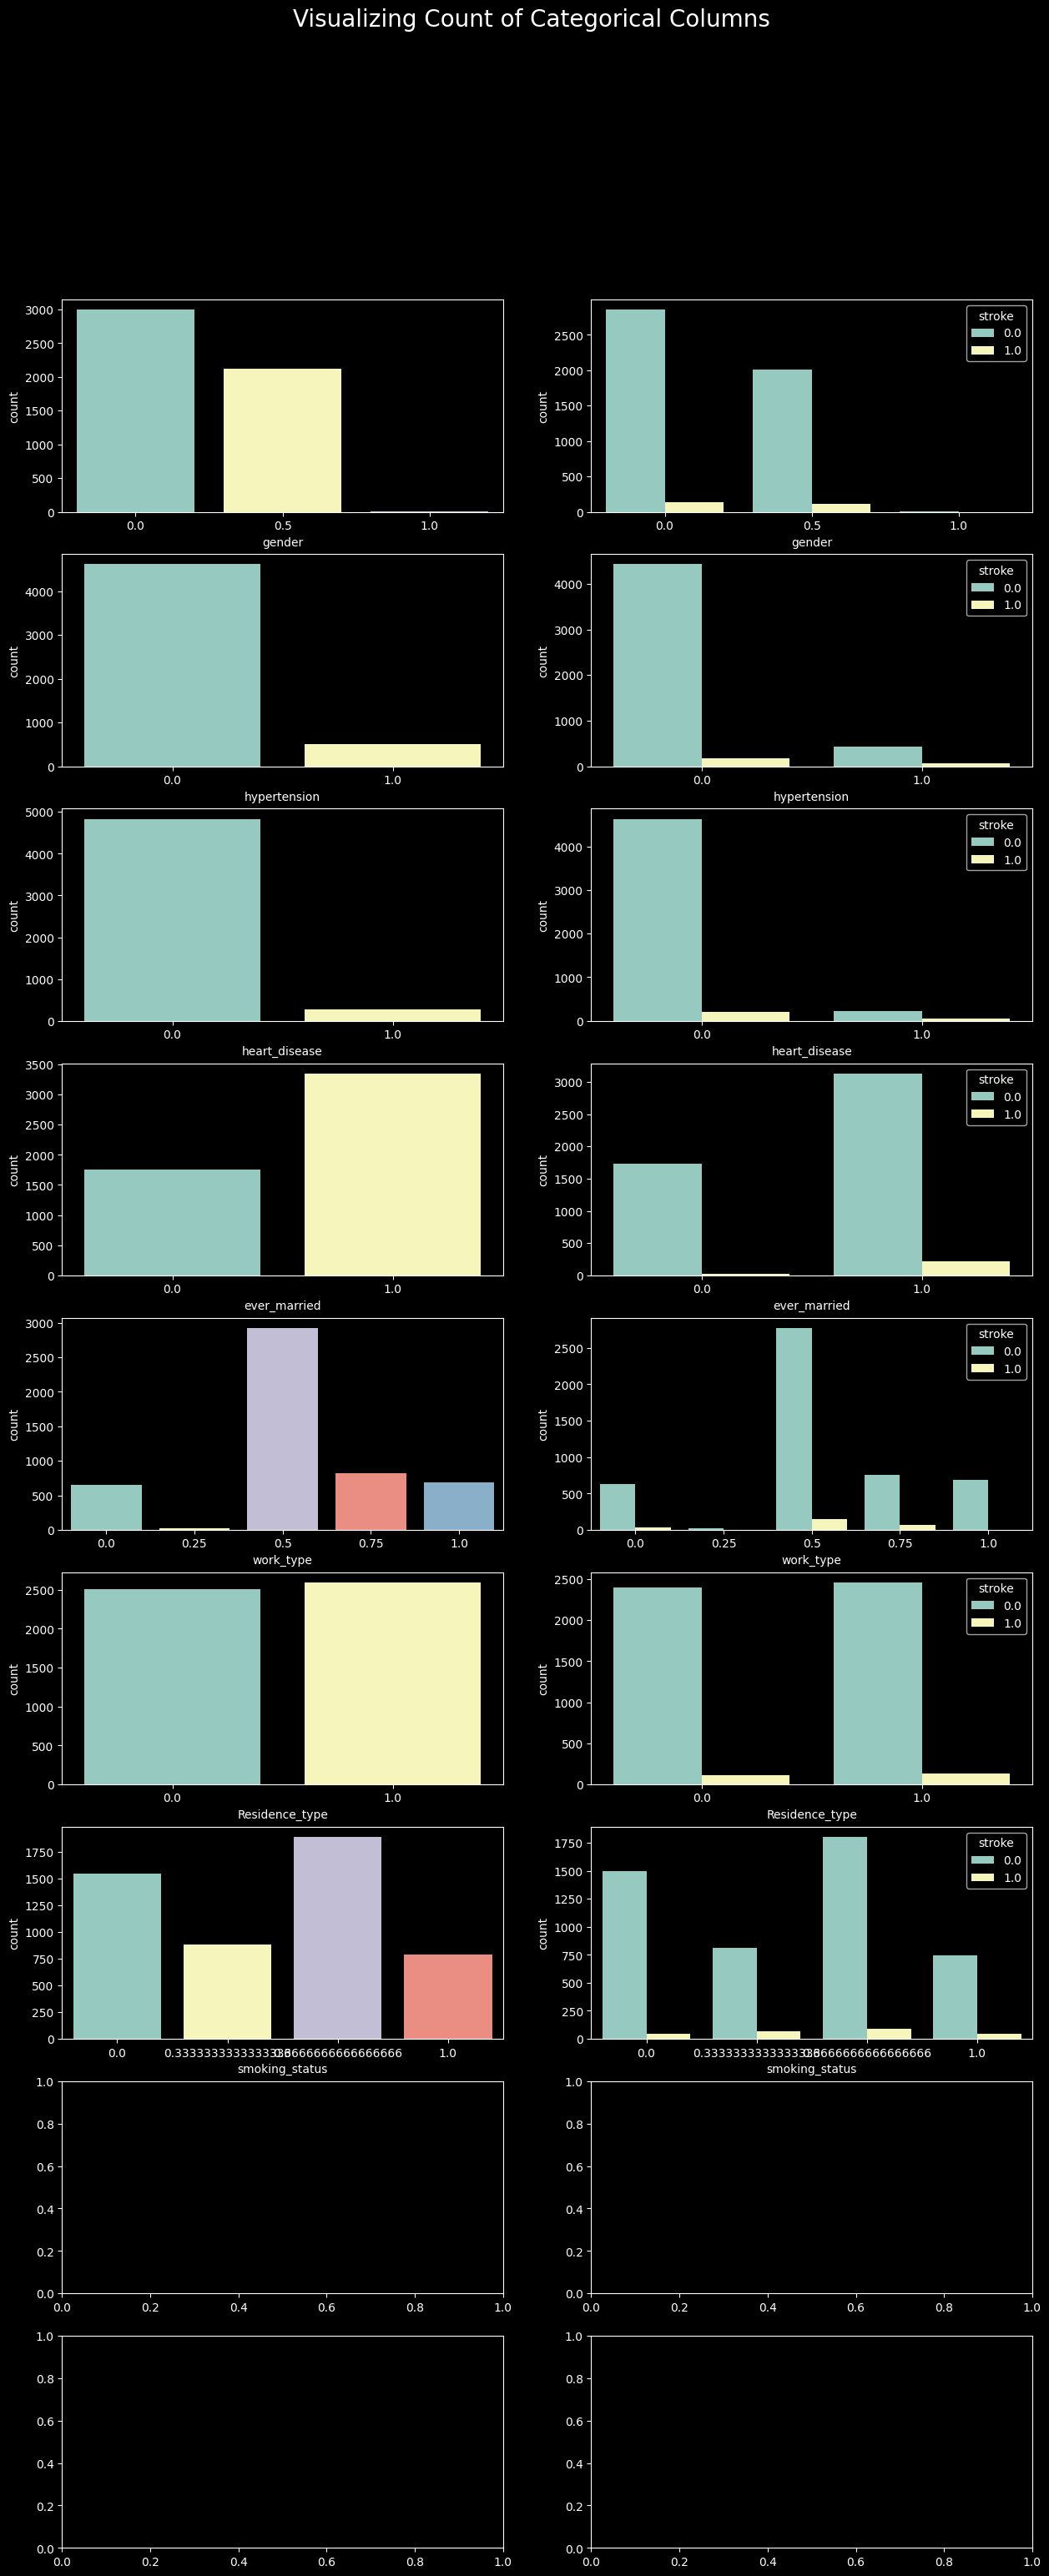

In [ ]:
fig,ax=plt.subplots(9,2,figsize=(15,35))
for index, i in enumerate(cat_cols):
    plt.suptitle("Visualizing Count of Categorical Columns", size=20)

    sns.countplot(data=dataset,x=i,ax=ax[index,0])
    sns.countplot(data=dataset,x=i,ax=ax[index,1],hue='stroke')

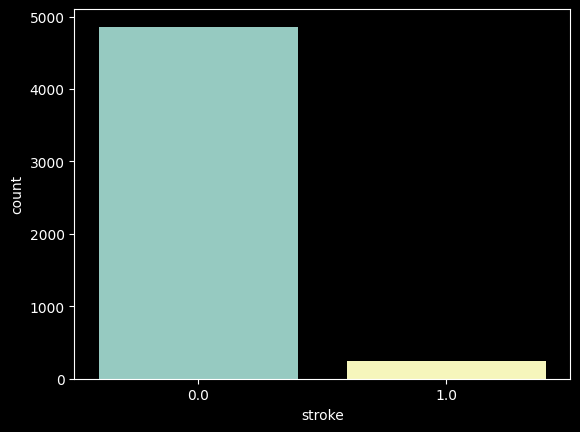

In [ ]:
sns.countplot(data=dataset,x='stroke')
plt.show()

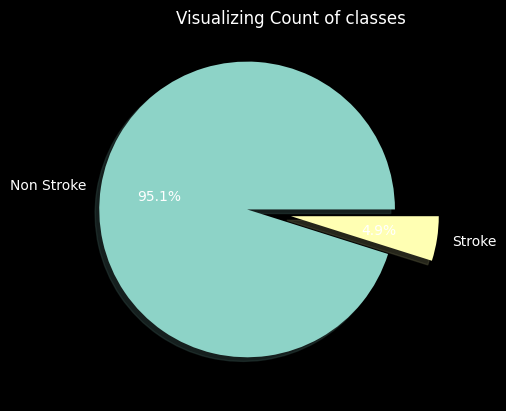

In [ ]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(dataset['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

# Visualizing Distribution of Continous Columns

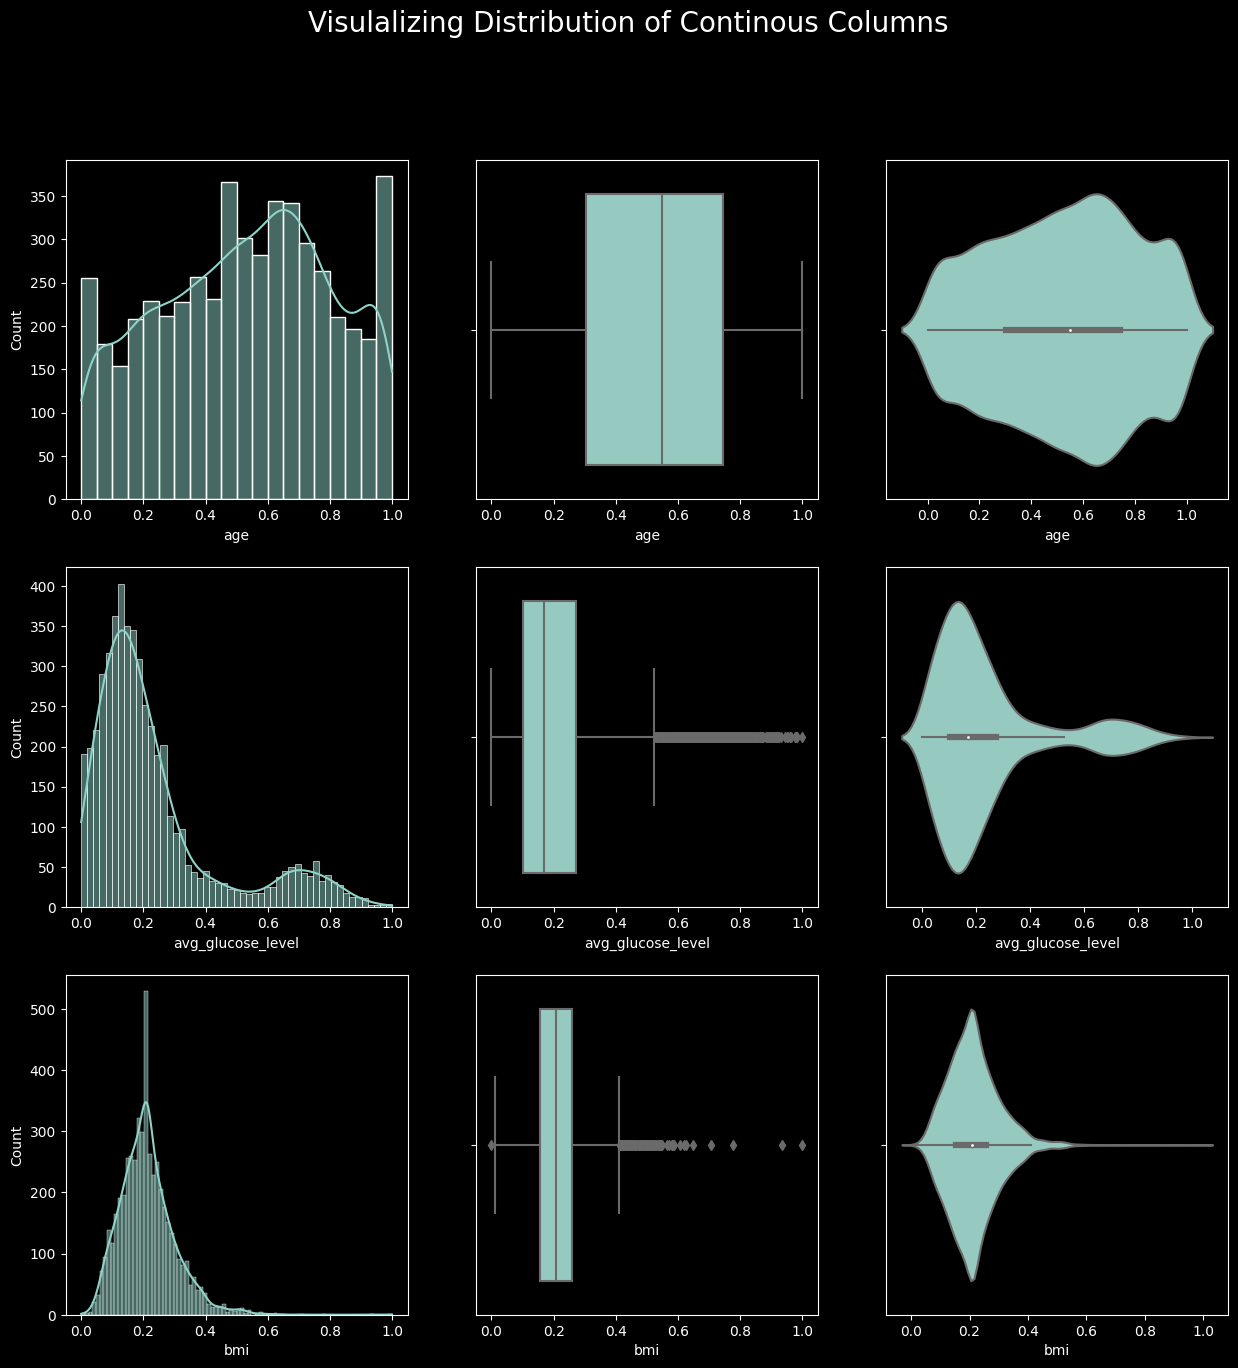

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index, i in enumerate(con_cols):
    plt.suptitle("Visulalizing Distribution of Continous Columns", size=20)
    sns.histplot(dataset[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=dataset,x=i,ax=ax[index,1])
    sns.violinplot(data=dataset,x=i,ax=ax[index,2])

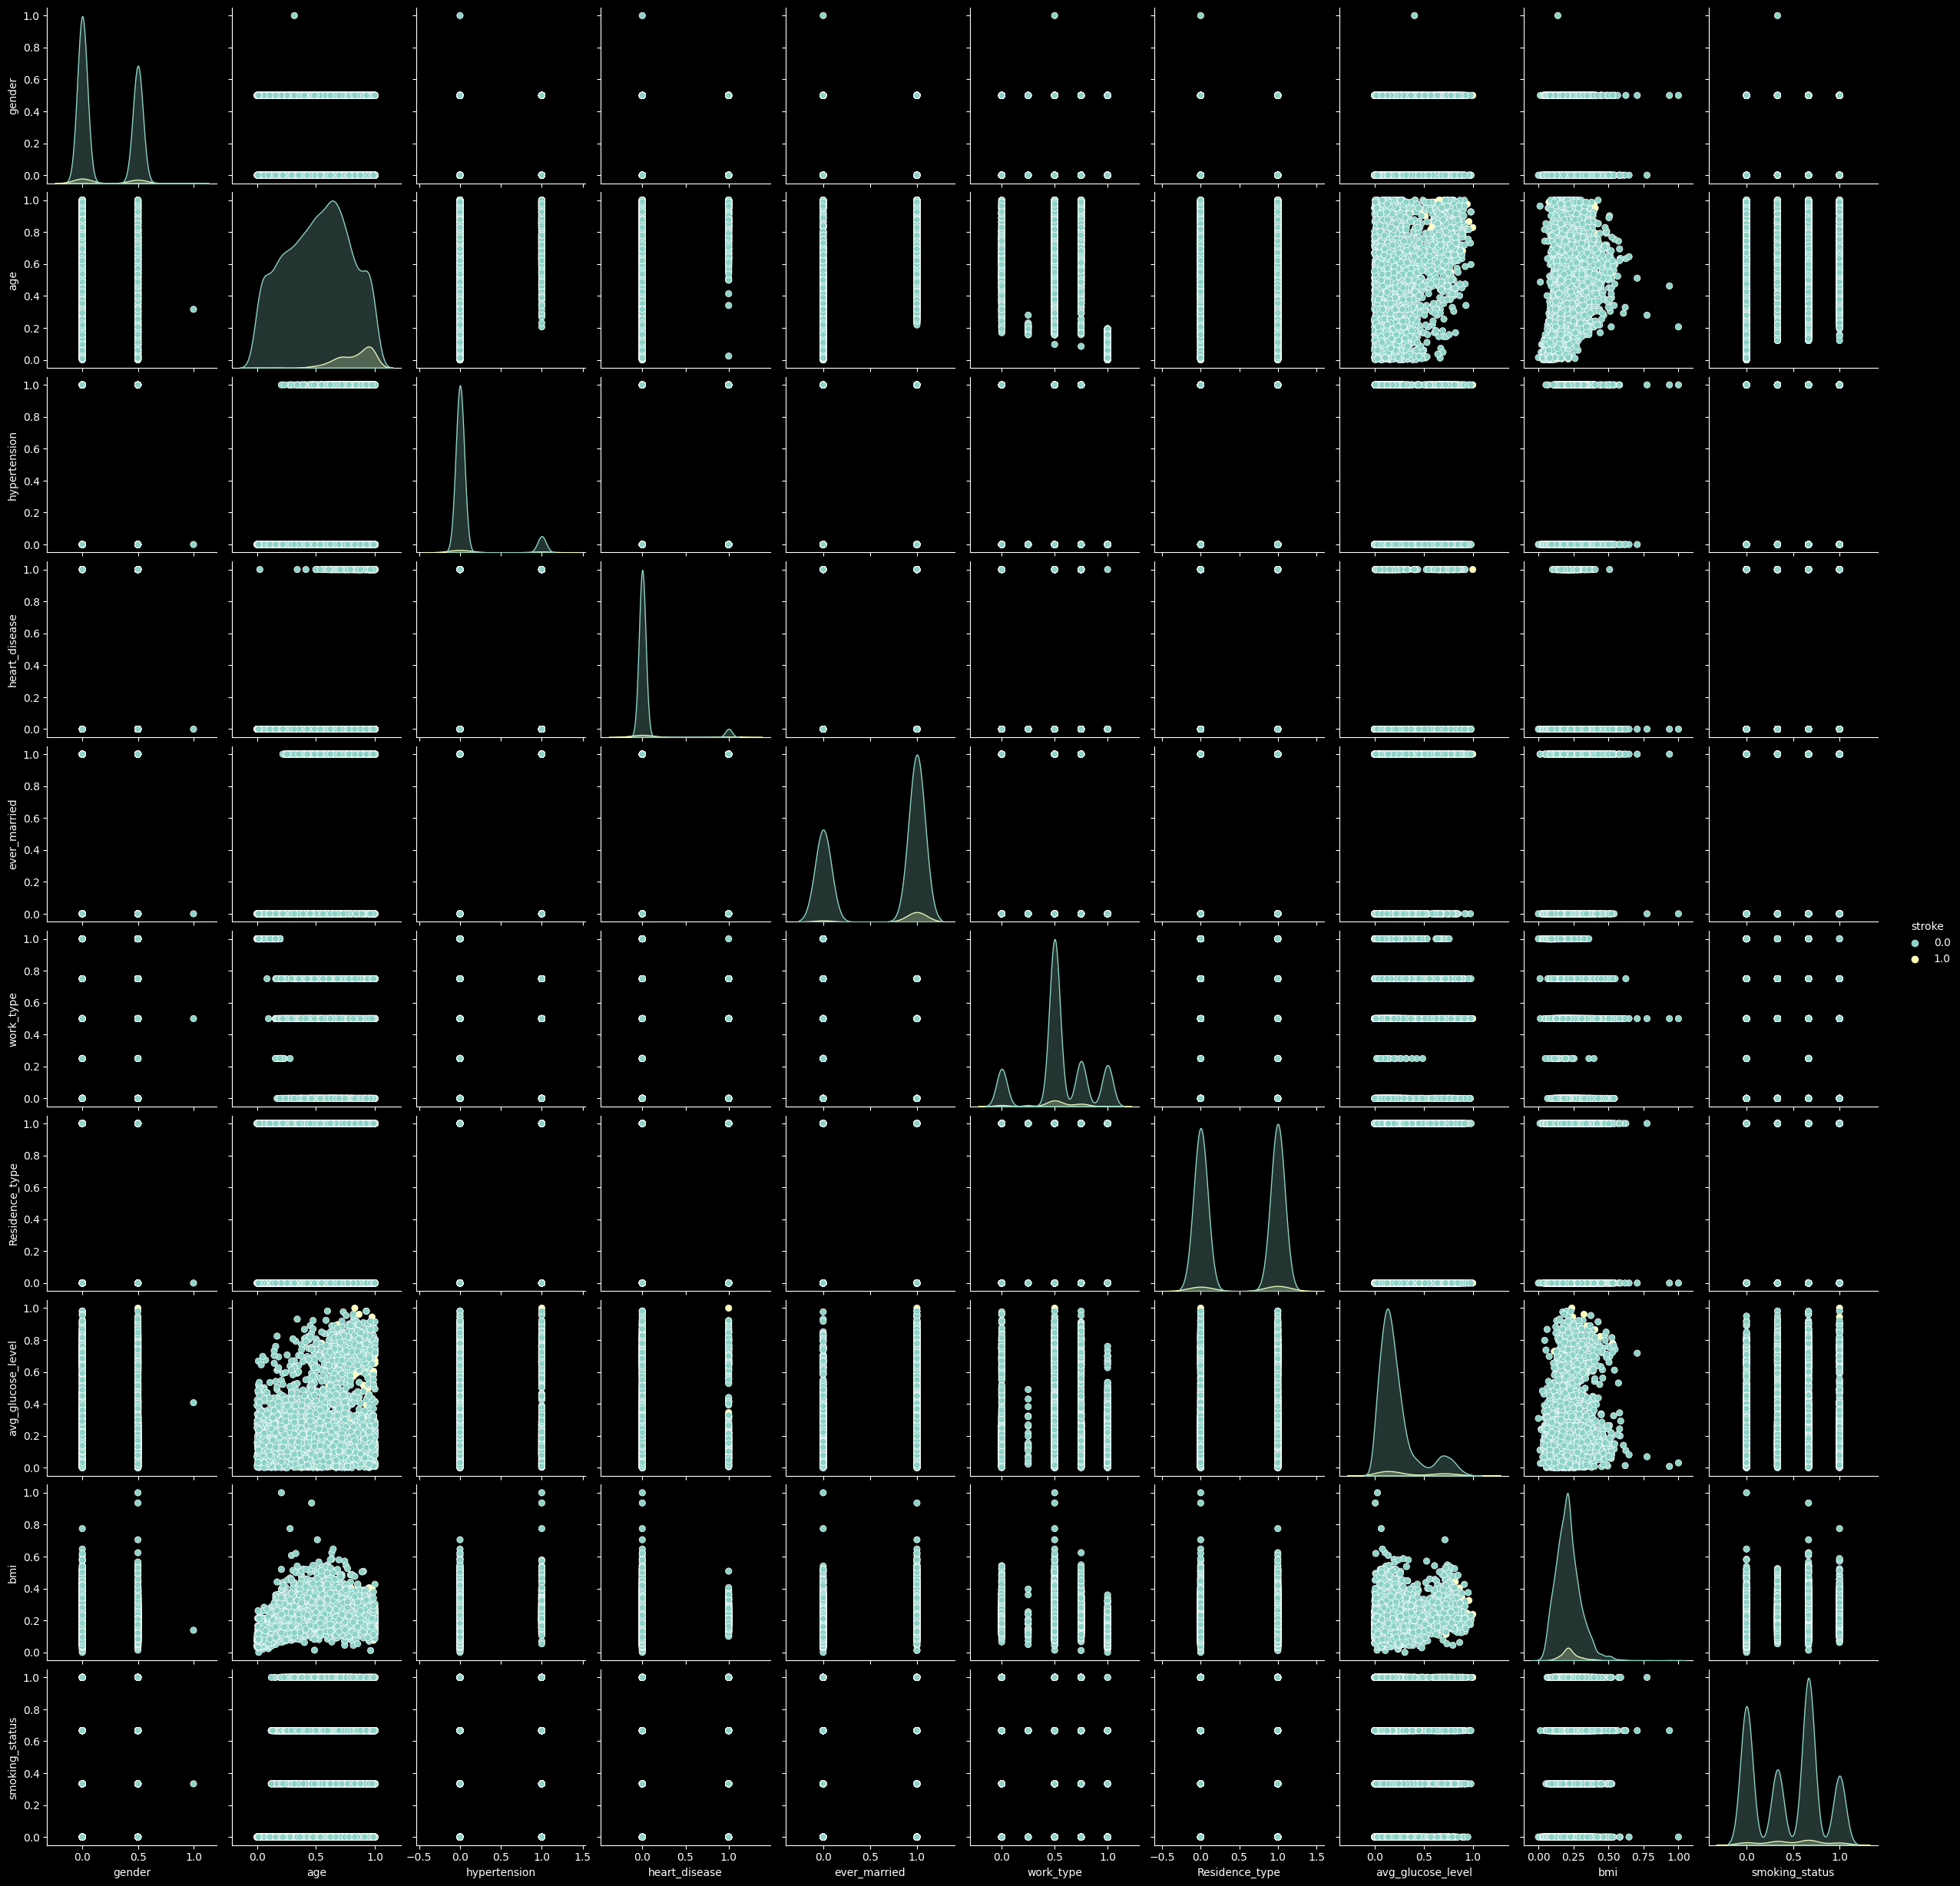

In [ ]:
sns.pairplot(data=dataset, hue='stroke')

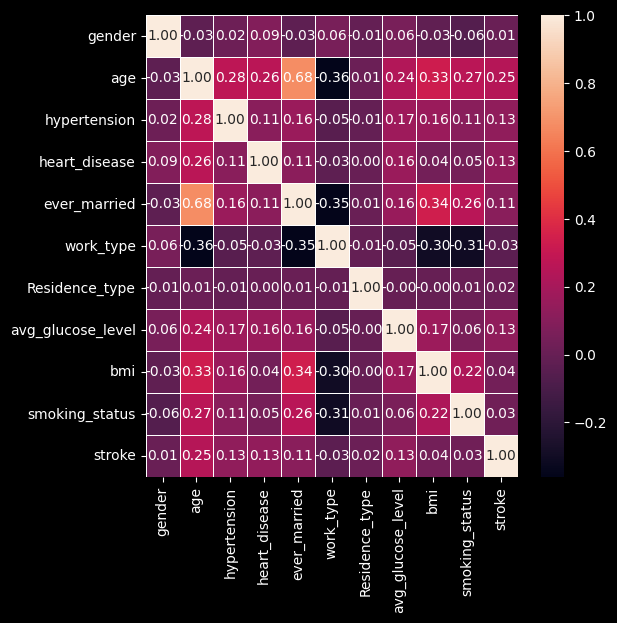

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(dataset.corr(),annot=True, linewidth=0.5, fmt='0.2f')
plt.show()